In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
#a)

X = stats.randint.rvs(0,31, size = 100)
# para que al aumentar el día baje la cant de posteos (jugar con los betas)
true_betas = np.array([5, -0.3])
X_con_intercepto = np.column_stack((np.ones(X.shape[0]), X))

mu = np.exp(np.dot(X_con_intercepto, true_betas)) # función de vínculo
Y = stats.poisson.rvs(mu)

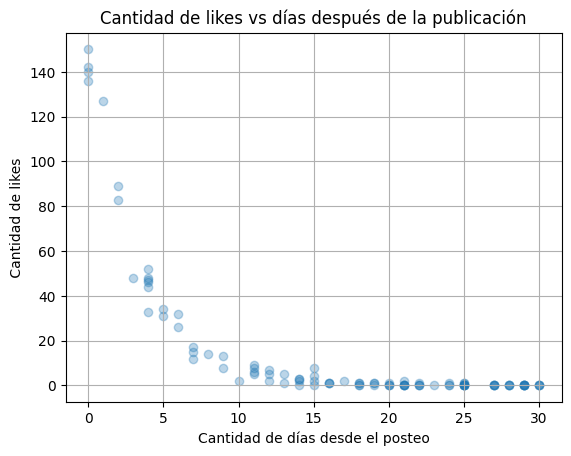

In [53]:
fig, ax = plt.subplots()
ax.scatter(X, Y, alpha = 0.3)
ax.set_xlabel("Cantidad de días desde el posteo")
ax.set_ylabel(" Cantidad de likes ")
ax.set_title("Cantidad de likes vs Cantidad de días después del posteo")
plt.grid()

In [62]:
#a)
def neg_log_likelihood_poisson(betas, X,Y):
  mu = np.exp(np.dot(X, betas)) # función de vínculo
  return - np.sum ( Y * np.log(mu) - mu)


b0 =  4.97515340859431
b1 =  -0.2912451342532565


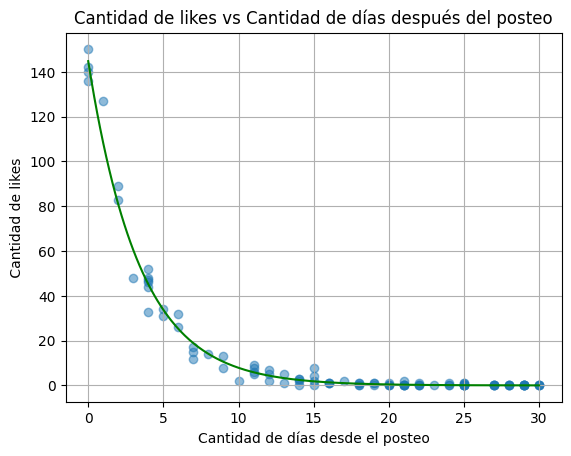

In [64]:
from scipy.optimize import minimize

initial_beta = np.zeros(X_con_intercepto.shape[1])

res_poisson = minimize(neg_log_likelihood_poisson, initial_beta, args=(X_con_intercepto, Y))

b0 = res_poisson.x[0]
b1 = res_poisson.x[1]

print('b0 = ', b0)
print('b1 = ', b1)

x_range = np.linspace(X.min(), X.max(), 300)
poisson_fit = np.exp(b0 + b1 * x_range)

fig, ax = plt.subplots()
ax.scatter(X, Y, alpha=0.5)
ax.plot(x_range,poisson_fit,color='g')
ax.set_xlabel("Cantidad de días desde el posteo")
ax.set_ylabel(" Cantidad de likes ")
ax.set_title("Cantidad de likes vs Cantidad de días después del posteo")
plt.grid()
plt.show()

In [66]:
#c)
from numpy.linalg import inv

mu = np.exp(X_con_intercepto@res_poisson.x)
W = np.diag(mu)
I = X_con_intercepto.T @ W @ X_con_intercepto
cov_matrix = inv(I)
cov_matrix

array([[ 1.09586659e-03, -1.47218337e-04],
       [-1.47218337e-04,  5.18622051e-05]])

In [68]:
se_b0 = np.sqrt(cov_matrix[0,0])
se_b1 = np.sqrt(cov_matrix[1,1])
print("se(b0) =",se_b0)
print("se(b1) =",se_b1)

se(b0) = 0.033103875716497484
se(b1) = 0.007201541855973357


In [78]:
np.set_printoptions()  # restablece todos los valores por defecto
alpha = 0.05
bo = res_poisson.x[0]
b1 = res_poisson.x[1]

z_alpha_2 = stats.norm.ppf(1- alpha / 2)
IC_95_b0 = [ b0 - z_alpha_2 * se_b0, b0 + z_alpha_2 * se_b0]
IC_95_b1 = [ b1 - z_alpha_2 * se_b1, b1 + z_alpha_2 * se_b1]

print(f'Intervalo de confianza 95% para beta_0: {IC_95_b0}')
print(f'Intervalo de confianza 95% para beta_1: {IC_95_b1}')

Intervalo de confianza 95% para beta_0: [4.9102710044412845, 5.040035812747336]
Intervalo de confianza 95% para beta_1: [-0.305359896924122, -0.27713037158239096]


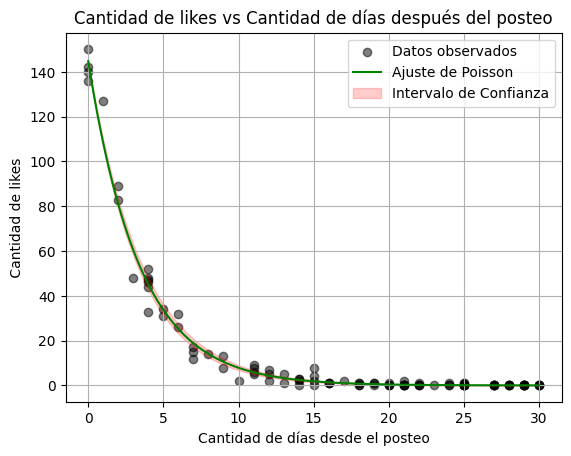

In [86]:
#muestro los errores en gráfico a partir de un IC.95 para b1 a b0 constante
mu_alto = np.exp(b0 + (b1 + se_b1 *1.96) * x_range)
mu_bajo = np.exp(b0 + (b1 - se_b1 *1.96) * x_range)

fig, ax = plt.subplots()
ax.scatter(X, Y, alpha=0.5,color='k', label = "Datos observados ")
ax.plot(x_range,poisson_fit,color='g', label = "Ajuste de Poisson")
ax.fill_between(x_range, mu_bajo, mu_alto, alpha=0.2,color = 'red',
                label = "Intervalo de Confianza")

ax.set_xlabel("Cantidad de días desde el posteo")
ax.set_ylabel(" Cantidad de likes ")
ax.set_title("Cantidad de likes vs Cantidad de días después del posteo")
plt.grid()
plt.legend()
plt.show()

# Notar que el IC es un muy chiquito, por eso casi no se ve. Al aumentar los días
# este efecto se incrementa.